In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

#import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [26]:
#Import the dataset

dataset = pd.read_csv('DATASETS/Mall_Customers.csv')

#Exploratory Data Analysis
#As this is unsupervised learning so Label (Output Column) is unknown

dataset.head(10) #Printing first 10 rows of the dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [27]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [28]:
dataset.info() # there are no missing values as all the columns has 200 entries properly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
dataset.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [31]:
### Feature sleection for the model
#Considering only 2 features (Annual income and Spending Score) and no Label available
X= dataset.iloc[:, [2,3,4]].values

In [32]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [33]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/ugadingenieria01/.local/lib/python3.10/sit

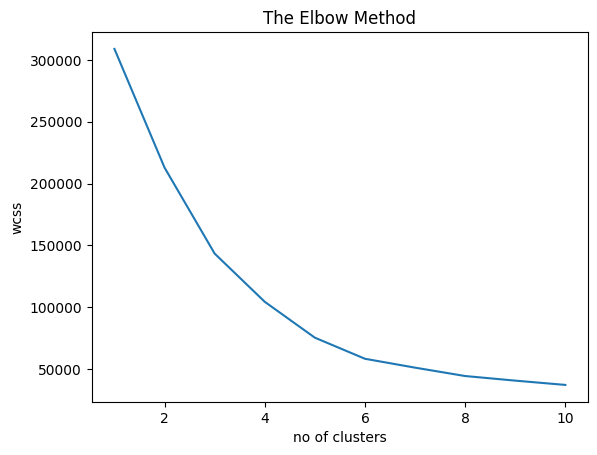

In [34]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
#If you zoom out this curve then you will see that last elbow comes at k=5
#no matter what range we select ex- (1,21) also i will see the same behaviour but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=5

#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

/home/ugadingenieria01/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans

# Load data
def load_data():
    dataset = pd.read_csv('DATASETS/Mall_Customers.csv')
    return dataset

dataset = load_data()

# Select features
X = dataset.iloc[:, [2,3,4]].values

# Select number of clusters
# For Jupyter notebooks, you need to manually set the number of clusters
num_clusters = 5

# Build Model
kmeansmodel = KMeans(n_clusters= num_clusters, init='k-means++', random_state=0, n_init=10)
y_kmeans= kmeansmodel.fit_predict(X)

# Visualization

df = pd.DataFrame(X, columns=['Age', 'Annual_Income', 'Spending_Score'])
df['cluster'] = y_kmeans

# Use a color scale that provides more colors
fig = px.scatter_3d(df, x='Age', y='Annual_Income', z='Spending_Score', color='cluster', color_continuous_scale=px.colors.sequential.Plasma)

# Update layout - You might want to adjust the height and width to better suit Jupyter notebook environment
fig.update_layout(height=600, width=800)

# Show plot
fig.show()
